In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# will not work until you pip3 install import-ipynb and pip3 install nbformat\n",
import import_ipynb
from format_csv import csv_format

# Set up plot specifications
sns.set(style='ticks')
sns.axes_style('white')
sns.set_context('paper')
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'Avenir'

importing Jupyter notebook from format_csv.ipynb
../data/Lab_1/Formatted/scope_5.csv <class 'str'>


/tmp/ipykernel_4353/4243071322.py:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, color = '#07DCCB', LineWidth=2, label="Raw")
/tmp/ipykernel_4353/4243071322.py:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='#000000', LineWidth=2, label="FFT")
/home/tchan/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


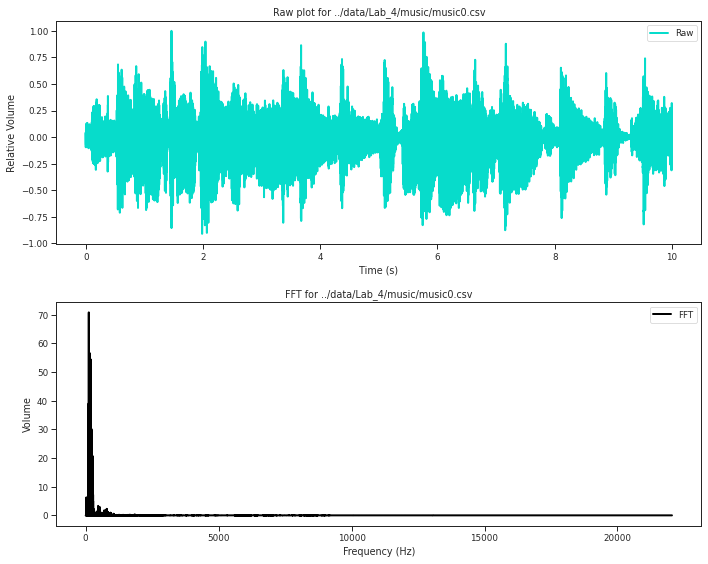

In [6]:
# Plot Raw data from CSV
file = "music0"
filename = f"../data/Lab_4/music/{file}.csv"
df = pd.read_csv(filename, delimiter=',', skiprows=0)
dt = 1/44100
t = df['Time'] 
f = df['Audio']

# # Plot Raw data from CSV
# plt.plot(t, f, LineWidth=1, label="lemonade", color = '#07DCCB')
# plt.xlabel('Time (s)')
# plt.ylabel('Relative Volume')
# plt.title(f'Raw data from {filename}')
# plt.legend()

# Compute the Fast Fourier Transform (FFT)
n = len(t)                     
fhat = np.fft.fft(f,n)       
PSD = fhat * np.conj(fhat)/n 
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)
plt.rcParams['figure.figsize'] = [10, 8]

# Raw Plot
plt.sca(axs[0])
plt.plot(t, f, color = '#07DCCB', LineWidth=2, label="Raw")
plt.title(f'Raw plot for {filename}')
plt.xlabel("Time (s)")
plt.ylabel("Relative Volume")
plt.legend()

# FFT of Raw Data
plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='#000000', LineWidth=2, label="FFT")
plt.title(f'FFT for {filename}')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volume")
plt.legend()
plt.tight_layout()

image_path = f"../data/Lab_4/music/music_fft_plots/{file}_fft_plot.png"
plt.savefig(image_path, dpi=300, bbox_inches='tight', transparent=False)

plt.show()

In [4]:
freq_array = np.array(freq[L])
psd_array = np.array(PSD[L])
df = pd.DataFrame(list(zip(*[freq_array, psd_array])))
df.columns=['Time', 'Relative Volume']
df.to_csv(f'../data/Lab_4/music/music_fft_csv/{file}_fft.csv', index=False)